#### Sumission By: Khadija Shafique

## Task 1- Prediction using Supervised ML

###  Simple Linear Regression

Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
#Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data from url
url = "http://bit.ly/w-data"
students= pd.read_csv(url)
print("data imported sucessfully")
students

data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#display information about total rows and cols
#and total data in each rows
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# show columns having missing values
students.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data Visulaization 

Now let's plot a graph of our data so that it will give us clear idea about data

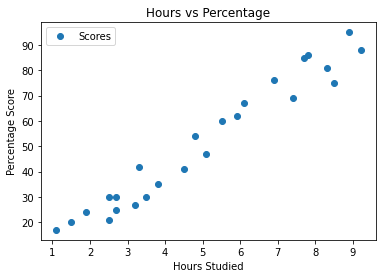

In [5]:
students.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Train Test Split

In [6]:
#spliting data into traning and testing
from sklearn.model_selection import train_test_split

y=students['Scores']
x=students.drop(['Scores'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.2, random_state=123)

### Training Model

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)
print("training complete")

training complete


In [8]:
#To retrieve the intercept:
print("intercept:",lr.intercept_)

#For retrieving the slope:
print("Slope:",lr.coef_)

intercept: 5.596805630752577
Slope: [9.34759069]


if a student studies one hour more than they previously studied for an exam, they can expect to
achieve an increase of 9.93% in the score achieved by the student previously.

### Visualization of Best Fit Line

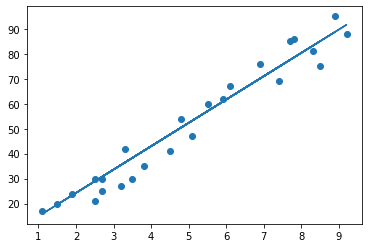

In [9]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Traning Testing Accuray

In [10]:
print('Training Score')
print(lr.score(x_train, y_train))
print('Testing Score')
print(lr.score(x_test,y_test))

Training Score
0.9551737288200768
Testing Score
0.9480216401377187


### Predictions

In [11]:
y_pred = lr.predict(x_test)

#Comparing Actual and prdected values
data= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
data.head()

,Actual,Predicted
5,20,19.618192
21,54,50.465241
22,35,41.117650
18,67,62.617109
15,95,88.790363


In [12]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', lr.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [92.06201949]


### Model Evaluation Metrics

In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.791337303735789
Mean Squared Error: 31.101251623596006
Root Mean Squared Error: 5.576849614575957


### Conclusion

##### After sucessful model traning and obtaning prediction on data we can conculde that if a student studies for 9.25 hrs/ day, he/she is expected to score 92.06 marks (appox.)